In [1]:
"""     
Student Name:  ZHANG Xinyue                /        Qiao  Shuyu        /       Li Zhuoxuan
Student ID:    20750194                    /          20747563         /        20740917
Student Email: xzhangfa@connect.ust.hk     /   sqiaoac@connect.ust.hk  /   zlify@connect.ust.hk
Course Name:   MSBD5012
URL in github: https://github.com/orange-neng/MSBD5012-Forest-type-prediction-exploration
"""

'     \nStudent Name:  ZHANG Xinyue                /        Qiao  Shuyu        /       Li Zuoxuan\nStudent ID:    20750194                    /          20747563         /        20740917\nStudent Email: xzhangfa@connect.ust.hk     /   sqiaoac@connect.ust.hk  /   zlify@connect.ust.hk\nCourse Name:   MSBD5012\nURL in github: https://github.com/orange-neng/MSBD5012-Forest-type-prediction-exploration\n'

# Overview (Exploratory Data Analysis)

Let's first begin with an overview of the forest cover type prediction dataset.The main goal of this analysis is to check the dataset's integrity, correctness, and characteristic for future data cleaning, and classification.

In [3]:
# Import common libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# sns.set_theme(style="white")

# Import Datasets
df_train = pd.read_csv('./forest-cover-type-prediction/train.csv')
df_test = pd.read_csv('./forest-cover-type-prediction/test.csv')

sns.set_style("darkgrid")

The dataset have a total of 581012 rows. Besides the final prediction result and id column, there are 54 columns for prediction. We can divide them into 3 categories: geometric information (elevation, aspect, slope, distance to  hydrology and roadways), light and shade infomation (hill shade at different time), wilderness and soil information (wilderness area tag and 40 kinds of soil type). Among them, wilderness and soil is binary, while others are actual numerical value.

In [2]:
print('Shape of train dataset:', df_train.shape)
print('Shape of test dataset:', df_test.shape)

Shape of train dataset: (15120, 56)
Shape of test dataset: (565892, 55)


In [3]:
print('Overview of attributes:')
df_train.dtypes

Overview of attributes:


Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

In [4]:
# Statistical Data
pd.set_option('display.max_columns', None) 
df_train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

From the above dataset overview, we can find the following hints:
a) For each column, the count number are the same. This suggest each row is complete.
b) Soil type 7 and 15 are all zero, so they do not provide any information and can be removed.
c) Scales of each attributes are varied. Standardisation may be necessary under some cases.

Therefore, we will (a) Drop soil type 7 and 15, (b) Drop ID columns in further analysis.

In [5]:
# Drop soil type 7 and 15
df_train = df_train.drop(['Soil_Type7', 'Soil_Type15'], axis = 1)
df_test = df_test.drop(['Soil_Type7', 'Soil_Type15'], axis = 1)

# Drop id
df_train = df_train.iloc[:,1:]
df_test = df_test.iloc[:,1:]

Next, let's explore the relationship between each attributes with correlation matrix. As this requires continuous data, we will ignore the binary values.

In [6]:
corr_data = df_train.iloc[:, :10] # 10 refers to the index of the last non-binary column
data_corr = corr_data.corr() # calculate correlation value

In [7]:
data_corr

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563
Aspect,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169
Slope,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527
Horizontal_Distance_To_Hydrology,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817
Vertical_Distance_To_Hydrology,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048
Horizontal_Distance_To_Roadways,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,0.486386
Hillshade_9am,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,0.078144
Hillshade_Noon,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,0.122098
Hillshade_3pm,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,0.043162
Horizontal_Distance_To_Fire_Points,0.443563,-0.052169,-0.239527,0.158817,-0.015048,0.486386,0.078144,0.122098,0.043162,1.000000


We can find the largest absolute value of coefficent is less than 0.8. For a better visualization, we set the deepest color as 0.8. 

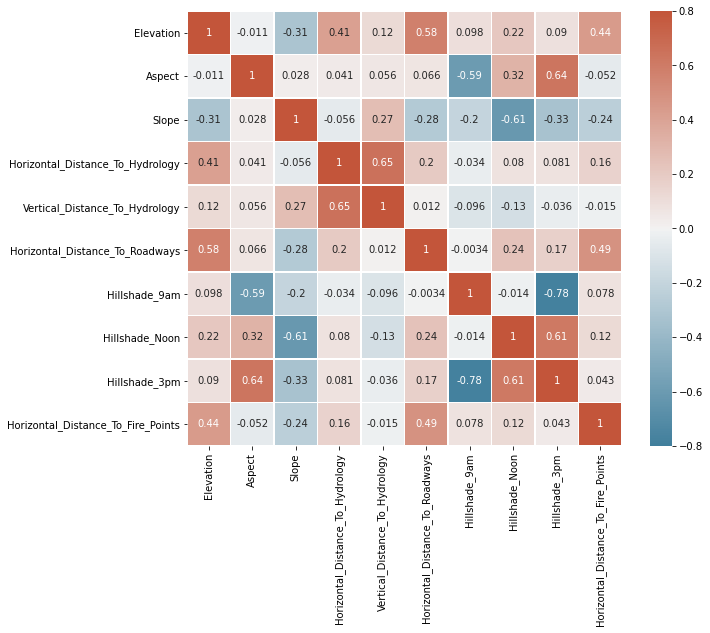

In [8]:
# Draw the graph
f, ax = plt.subplots(figsize = (10,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data_corr,cmap=cmap, vmax=.8,vmin=-.8, center= 0, square=True, annot=True, linewidths=.5);

Let's set the threshold as +/- 0.5 for further filtering. If the correlation coefficient has an absolute value larger than 0.5,
that means it has some correlation (either positive or negative).In summary, there are several kinds of conclusions: 
1. Hillshade at 9am has a negative correlation with hillshade at 3pm. (-0.78)
2. Horizontal distance to hydrology has a positive correlation with the corresponding vertical distance. (0.65)
3. Hillshade at 3pm has a positive correlation with aspect. (0.64)
4. Hillshade at noon has a positive correlation with hillshade at 3pm.(0.61)
5. Hillshade at noon has a negative correlation with slope. (-0.61)
6. Hillshade at 9am has a negative correlation with aspect. (-0.59)
7. Horizontal distance to roadway has a positive correlation with elevation. (0.58)

Based on the above conclusions, let's draw scatter plot of them. These plots has can give us very intuitive conclusions of classification.

In [9]:
df_train

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15116,2603,121,19,633,195,618,249,221,91,1325,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15117,2492,134,25,365,117,335,250,220,83,1187,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15118,2487,167,28,218,101,242,229,237,119,932,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [10]:
corr_list = []
x_list = set()
y_list = set()
cols = corr_data.columns
for i in range(0, 10):
    for j in range(i+1, 10):
        if abs(data_corr.iloc[i,j])>= 0.5:
            corr_list.append([data_corr.iloc[i,j],i,j])
            x_list.add(cols[i])
            y_list.add(cols[j])

x_list = list(x_list)
y_list = list(y_list)

In [11]:
x_list, y_list

(['Hillshade_Noon',
  'Horizontal_Distance_To_Hydrology',
  'Aspect',
  'Hillshade_9am',
  'Elevation',
  'Slope'],
 ['Hillshade_Noon',
  'Hillshade_9am',
  'Horizontal_Distance_To_Roadways',
  'Vertical_Distance_To_Hydrology',
  'Hillshade_3pm'])

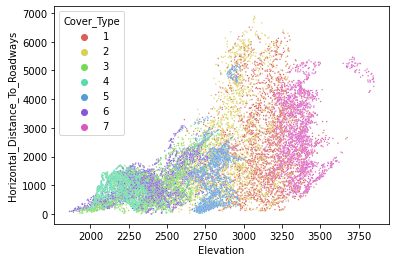

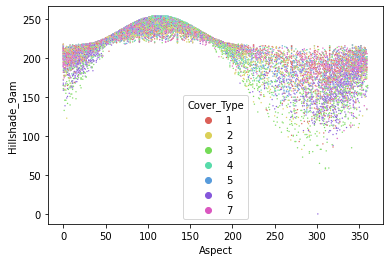

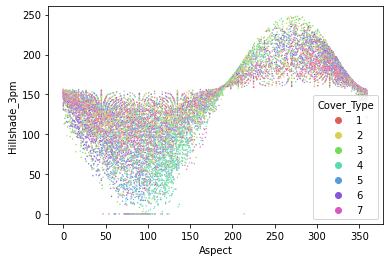

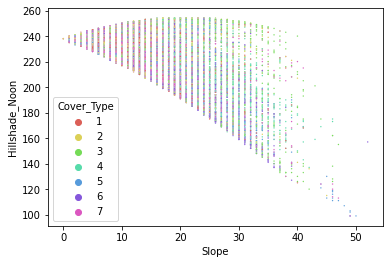

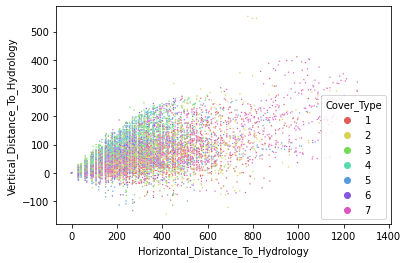

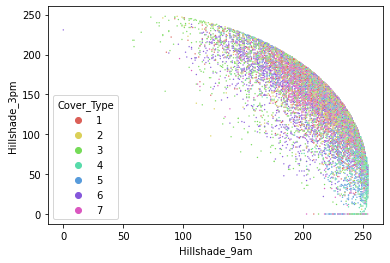

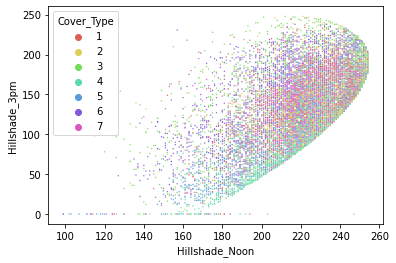

In [12]:
# skew the first 10 columns for normalization
df_train.iloc[:, :10].skew()
pal = sns.color_palette('hls', 7)
for v,i,j in corr_list:
    sns.scatterplot(data = df_train, hue='Cover_Type', x=cols[i], y=cols[j], s=2, palette = pal)
    plt.show()


In [14]:
df_train.to_csv('./cleaned_train.csv')

In [15]:
df_test.to_csv('./cleaned_test.csv')